In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install opendatasets -q
import opendatasets as od
od.download("https://www.kaggle.com/datasets/zalando-research/fashionmnist")

100%|██████████| 68.8M/68.8M [00:01<00:00, 47.2MB/s]


In [3]:
train_df = pd.read_csv('/content/fashionmnist/fashion-mnist_train.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='label', ylabel='count'>

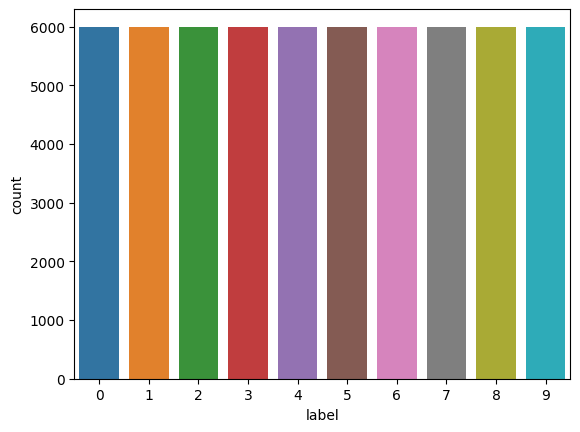

In [4]:
sns.countplot(x='label', data=train_df)

In [5]:
train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [6]:
train_df.shape

(60000, 785)

In [26]:
X_train = train_df.drop('label', axis=1)
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_train.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
X_train = X_train.values

In [29]:
X_train.shape

(60000, 784)

In [10]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [31]:
X_train[0].shape

(784,)

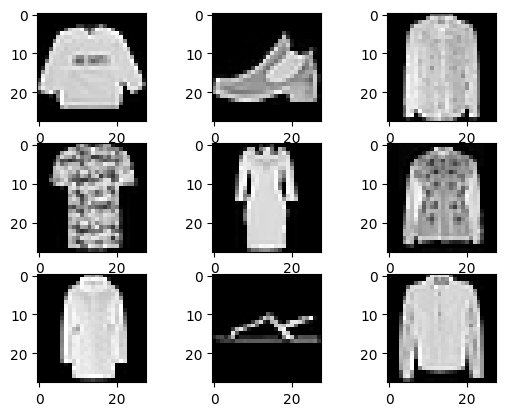

In [11]:
# Visualizing training data

fig, axes = plt.subplots(3,3)
index=0
for i in range(3):
  for j in range(3):
    axes[i,j].imshow(X_train[index].reshape(28,28), cmap='gray')
    index+=1

In [12]:
X_train = X_train / 255.0

In [13]:
X_train = X_train *2 -1
X_train[:2]

array([[[[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        ...,

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]]],


       [[[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [

In [14]:
X_train.max(), X_train.min()

(1.0, -1.0)

## Generator (G)

In [15]:
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Reshape, Dropout, Flatten
generator = tf.keras.Sequential()

generator.add(Dense(512, input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

generator.add(Dense(784))
generator.add(Reshape([28,28,1]))

In [16]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

## Discriminator (D)

In [17]:
discriminator = tf.keras.Sequential()

discriminator.add(Dense(1, input_shape=[28,28,1]))
discriminator.add(Flatten())

discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))

discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))

discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))

discriminator.add(Dense(1, activation='sigmoid'))

In [18]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 28, 28, 1)         2         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 128)              

In [19]:
GAN = tf.keras.Sequential([generator, discriminator])

discriminator.compile(optimizer='adam', loss='binary_crossentropy')
discriminator.trainable = False

In [20]:
GAN.compile(optimizer='adam', loss='binary_crossentropy')

In [21]:
GAN.layers

In [22]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         320656    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 242179    
                                                                 
Total params: 562835 (2.15 MB)
Trainable params: 318864 (1.22 MB)
Non-trainable params: 243971 (953.01 KB)
_________________________________________________________________


## Training the GAN

In [23]:
EPOCHS = 30
BATCH_SIZE=100
NOISE_INPUT_SHAPE=100

Epoch : 1
1/1 [==============================] - 0s 48ms/step


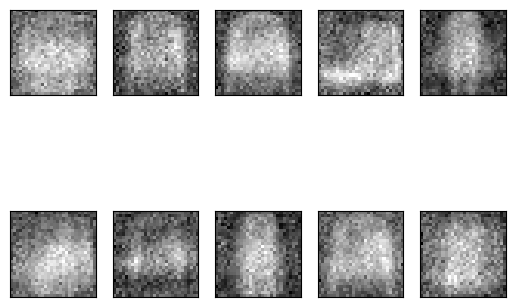

Epoch : 2
Epoch : 3
Epoch : 4
Epoch : 5
Epoch : 6
Epoch : 7
Epoch : 8
Epoch : 9
Epoch : 10
Epoch : 11
1/1 [==============================] - 0s 21ms/step


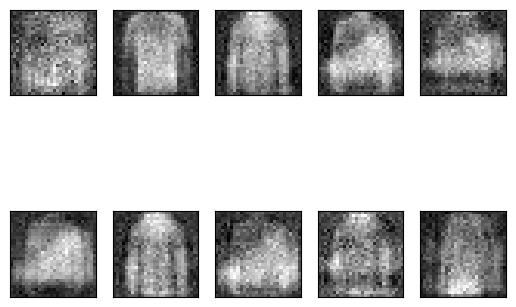

Epoch : 12
Epoch : 13
Epoch : 14
Epoch : 15
Epoch : 16
Epoch : 17
Epoch : 18
Epoch : 19
Epoch : 20
Epoch : 21
1/1 [==============================] - 0s 18ms/step


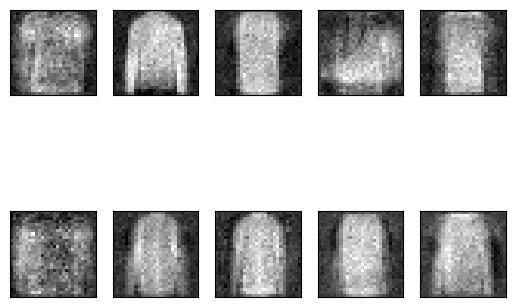

Epoch : 22
Epoch : 23
Epoch : 24
Epoch : 25
Epoch : 26
Epoch : 27
Epoch : 28
Epoch : 29
Epoch : 30


In [25]:
for epoch in range(EPOCHS):
  print(f'Epoch : {epoch+1}')

  for i in range(X_train.shape[0] // BATCH_SIZE):
    noise = np.random.normal(size=[BATCH_SIZE, NOISE_INPUT_SHAPE])

    gen_image = generator.predict_on_batch(noise);

    train_data = X_train[i*BATCH_SIZE : (i+1)*BATCH_SIZE];

    # Training Discriminator on real images
    train_label = np.ones(shape=(BATCH_SIZE,1))
    discriminator.trainable = True
    d_loss_real = discriminator.train_on_batch(train_data, train_label)

    # Training Discriminator on fake images
    train_label = np.zeros(shape=(BATCH_SIZE,1))
    d_loss_fake = discriminator.train_on_batch(gen_image, train_label)

    # Training the Generator
    noise = np.random.normal(size=[BATCH_SIZE,NOISE_INPUT_SHAPE]);
    train_label = np.ones(shape=(BATCH_SIZE,1))
    discriminator.trainable = False

    d_g_loss_batch = GAN.train_on_batch(noise, train_label)

  if epoch%10 ==0:
    samples =10
    x_fake = generator.predict(np.random.normal(loc=0,scale=1, size=(samples,100)))

    for k in range(samples):
      plt.subplot(2,5,k+1)
      plt.imshow(x_fake[k].reshape(28,28), cmap='gray')
      plt.xticks([])
      plt.yticks([])
    plt.show()